In [30]:
# Step 1: Load ChIP-Atlas enrichment result with your gene list
df = pd.read_csv("74genes-enrichment-chipAtlas_TFchip.tsv", sep="\t", header=None)

# Step 2: Add column names manually if not present
df.columns = ["SRX", "Class", "TF", "CellType", "Sample", "PeakCount", "GeneCount", "GeneOverlap", "Fold", "LogP", "Score"]

# Step 3: Keep only rows where gene overlap exists
df = df[df["GeneOverlap"].notna() & (df["GeneOverlap"] != "-")]

# Step 4: Extract individual target genes (some rows may contain comma-separated list)
df["Targets"] = df["GeneOverlap"].astype(str).str.split(",")
df = df.explode("Targets")
df["Targets"] = df["Targets"].str.strip()
df

SRX           Class      TF               CellType     Sample  \
0     SRX6370189  TFs and others    CBX7  Pluripotent stem cell     NT2-D1   
1     SRX6370188  TFs and others    CBX7  Pluripotent stem cell     NT2-D1   
2      SRX317569  TFs and others    EZH2  Pluripotent stem cell  iPS cells   
3     SRX6370190  TFs and others    CBX7  Pluripotent stem cell     NT2-D1   
4      SRX317578  TFs and others  JARID2  Pluripotent stem cell  iPS cells   
...          ...             ...     ...                    ...        ...   
1666  SRX9846084  TFs and others   PCGF3  Pluripotent stem cell    hESC H9   
1667  SRX9846085  TFs and others   PCGF3  Pluripotent stem cell    hESC H9   
1668  SRX9846086  TFs and others   PCGF3  Pluripotent stem cell    hESC H9   
1669  SRX9846088  TFs and others   PCGF3  Pluripotent stem cell    hESC H9   
1670  SRX9846091  TFs and others    RNF2  Pluripotent stem cell    hESC H9   

      PeakCount GeneCount GeneOverlap      Fold      LogP     Score  \
0           959     17/63   292/18948 -15.89190 -12.66890  17.51010   
1          2309     24/63  1031/18948 -13.95730 -11.03540   7.00125   
2          1020     16/63   566/18948 -10.32880  -7.58295   8.50210   
3           305      9/63    97/18948 -10.16790  -7.54698  27.90570   
4           547     11/63   287/18948  -8.45755  -5.93354  11.52750   
...         ...       ...         ...       ...       ...       ...   
1666        190      0/63     5/18948   0.00000   0.00000   0.00000   
1667        181      0/63     3/18948   0.00000   0.00000   0.00000   
1668        159      0/63     1/18948   0.00000   0.00000   0.00000   
1669        179      0/63     4/18948   0.00000   0.00000   0.00000   
1670        116      0/63    16/18948   0.00000   0.00000   0.00000   

         Targets  
0      292/18948  
1     1031/18948  
2      566/18948  
3       97/18948  
4      287/18948  
...          ...  
1666     5/18948  
1667     3/18948  
1668     1/18948  
1669     4/18948  
1670    16/18948  

[1671 rows x 12 columns]

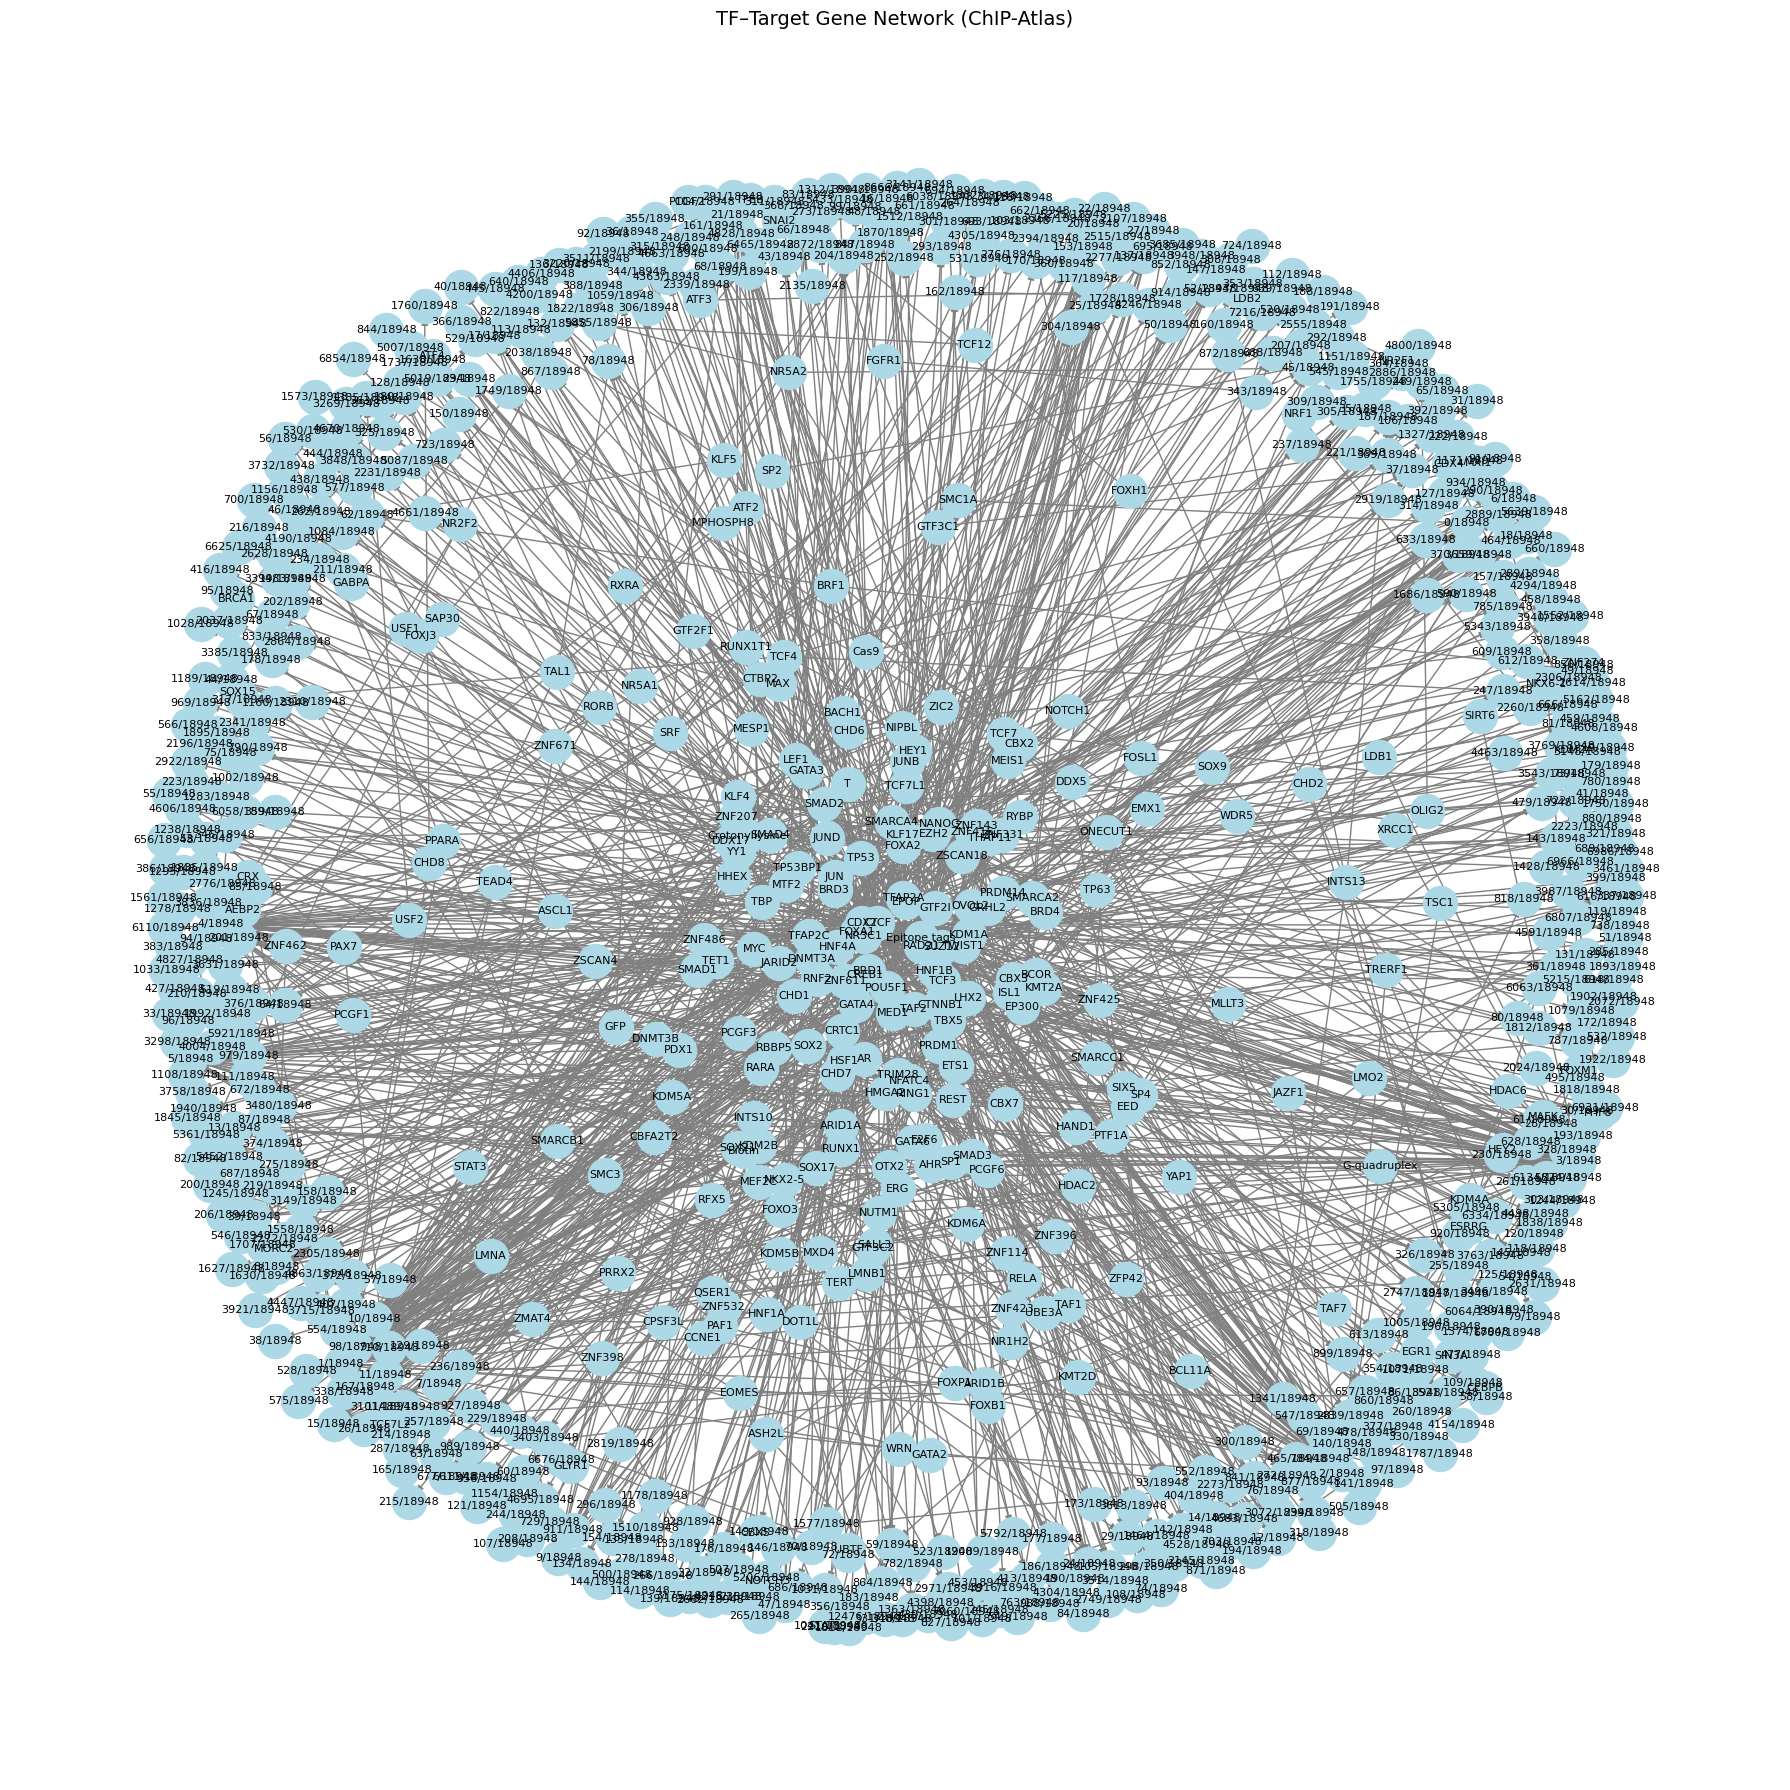

In [25]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Step 1: Load ChIP-Atlas enrichment result with your gene list
df = pd.read_csv("74genes-enrichment-chipAtlas_TFchip.tsv", sep="\t", header=None)

# Step 2: Add column names manually if not present
df.columns = ["SRX", "Class", "TF", "CellType", "Sample", "PeakCount", "GeneCount", "GeneOverlap", "Fold", "LogP", "Score"]

# Step 3: Keep only rows where gene overlap exists
df = df[df["GeneOverlap"].notna() & (df["GeneOverlap"] != "-")]

# Step 4: Extract individual target genes (some rows may contain comma-separated list)
df["Targets"] = df["GeneOverlap"].astype(str).str.split(",")
df = df.explode("Targets")
df["Targets"] = df["Targets"].str.strip()

# Step 5: Drop rows without clear target gene
df = df[df["Targets"] != ""]

# Step 6: Build the graph
G = nx.DiGraph()
for _, row in df.iterrows():
    tf = row["TF"]
    gene = row["Targets"]
    G.add_edge(tf, gene)

# Step 7: Draw the graph
plt.figure(figsize=(18, 18))
pos = nx.spring_layout(G, k=0.3)

nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=600)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")

plt.title("TF–Target Gene Network (ChIP-Atlas)", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.savefig("TF_target_network_tfchip.png", dpi=300)
plt.show()


In [12]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# PARAMETERS
chip_file = "74genes-enrichment-chipAtlas_TFchip.tsv"  # your enrichment file
top_n = 15  # number of top TFs to keep

## 1. Load ChIP-Atlas enrichment results
chip = pd.read_csv(chip_file, sep="\t")

# 2. Rename columns for easier reference
chip.columns = ["ID", "Antigen_class", "TF", "Cell_class", "Cell", "Num_peaks",
                "Overlap_A", "Overlap_B", "LogP", "LogQ", "FoldEnrichment"]

# 3. Sort by most significant LogP value (most negative)
top_chip = chip.sort_values(by="LogP").drop_duplicates(subset="TF").head(top_n)
top_chip


ID   Antigen_class       TF             Cell_class  \
0    SRX6370188  TFs and others     CBX7  Pluripotent stem cell   
1     SRX317569  TFs and others     EZH2  Pluripotent stem cell   
3     SRX317578  TFs and others   JARID2  Pluripotent stem cell   
11   SRX9846093  TFs and others     RNF2  Pluripotent stem cell   
12    SRX833403  TFs and others   CTNNB1  Pluripotent stem cell   
13   SRX5426118  TFs and others     MTF2  Pluripotent stem cell   
14   SRX3271016  TFs and others    KDM1A  Pluripotent stem cell   
15   SRX5426126  TFs and others    SUZ12  Pluripotent stem cell   
16    SRX116453  TFs and others     CHD1  Pluripotent stem cell   
17  SRX20140884  TFs and others   CPSF3L  Pluripotent stem cell   
18   SRX3472377  TFs and others  TP53BP1  Pluripotent stem cell   
20   SRX3288567  TFs and others    NANOG  Pluripotent stem cell   
21  SRX13198212  TFs and others    EOMES  Pluripotent stem cell   
23    SRX102996  TFs and others     CTCF  Pluripotent stem cell   
25    SRX100511  TFs and others    RAD21  Pluripotent stem cell   

                              Cell  Num_peaks Overlap_A   Overlap_B      LogP  \
0                           NT2-D1       2309     24/63  1031/18948 -13.95730   
1                        iPS cells       1020     16/63   566/18948 -10.32880   
3                        iPS cells        547     11/63   287/18948  -8.45755   
11                         hESC H9       1539     11/63   841/18948  -4.00032   
12                         hESC H1       4269      7/63   326/18948  -3.94577   
13                          NT2-D1        209      5/63   147/18948  -3.82975   
14   hESC derived pancreatic cells      10363     37/63  6611/18948  -3.80264   
15                          NT2-D1        142      4/63   105/18948  -3.32835   
16                         hESC H1        152      3/63    44/18948  -3.29515   
17       iPSC derived neural cells        280      5/63   200/18948  -3.23097   
18                         hESC H9        297      5/63   211/18948  -3.12845   
20                         hESC H9       7652      7/63   464/18948  -3.03838   
21  iPSC derived hippocampal cells        106      3/63    58/18948  -2.96320   
23                         hESC H1      24864     27/63  4663/18948  -2.75048   
25                         hESC H1      53425     33/63  6334/18948  -2.70078   

         LogQ  FoldEnrichment  
0  -11.035400         7.00125  
1   -7.582950         8.50210  
3   -5.933540        11.52750  
11  -1.891290         3.93387  
12  -1.868920         6.45808  
13  -1.783780        10.23000  
14  -1.783780         1.68328  
15  -1.335820        11.45760  
16  -1.327450        20.50650  
17  -1.286750         7.51905  
18  -1.206500         7.12706  
20  -1.157830         4.53736  
21  -1.101950        15.55670  
23  -0.938736         1.74149  
25  -0.909168         1.56696

/tmp/ipykernel_3228063/2233703658.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


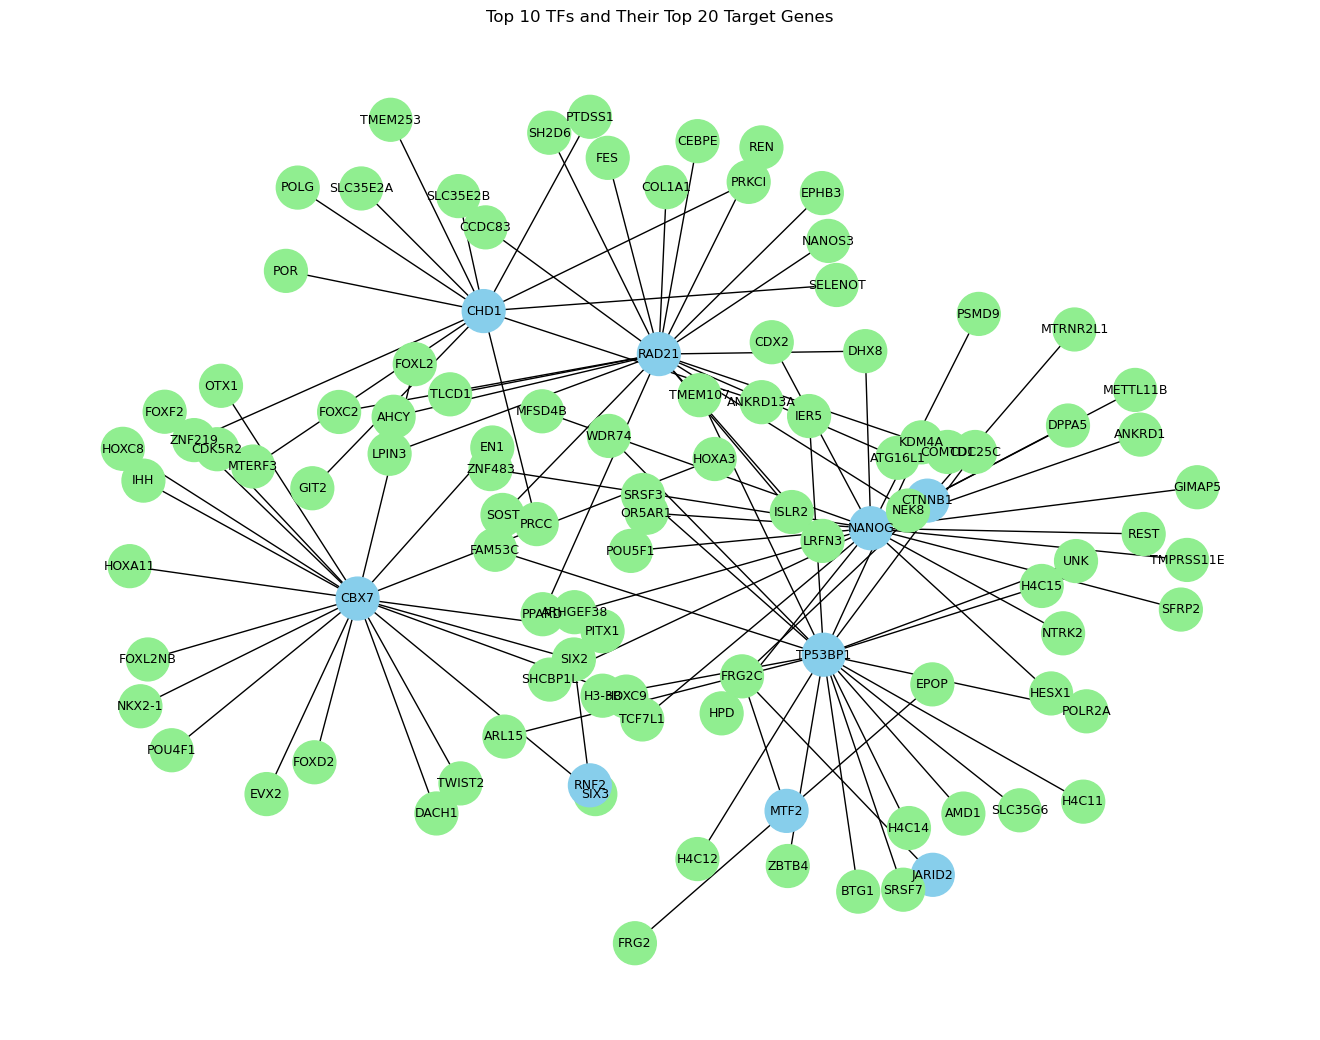

In [1]:
import os
import glob
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# --- PARAMETERS ---
data_dir = "chip_atlas_data/"  # Folder with TSV files
top_n_tfs = 20  # Top TFs to plot
top_n_targets = 20  # Max targets per TF
binding_threshold = 500  # Score filter
output_path = "chip_atlas_data/TF_TargetGene_Network_top20each.png"
# --- Load your 74 genes ---
input_genes = pd.read_csv("mCG_genenames_coords_withlifted.csv")
input_genes.columns = ["ensumblID", "chr", "start", "end", "gene_name"]
gene_set = set(input_genes["gene_name"].astype(str)) 

# --- STEP 1: Read and process TSV files ---
tsv_files = glob.glob(os.path.join(data_dir, "*.tsv"))
all_data = []

for file in tsv_files:
    tf_name = os.path.basename(file).split(".")[0]
    df = pd.read_csv(file, sep="\t")
    if df.empty or len(df.columns) < 2:
        continue
    avg_col = [col for col in df.columns if col.endswith("|Average")]
    if not avg_col:
        continue
    df = df[["Target_genes", avg_col[0]]]
    df.columns = ["Target_gene", "Binding_score"]
    df = df[df["Binding_score"] > binding_threshold]
    df = df.sort_values(by="Binding_score", ascending=False).head(top_n_targets)
    df["TF"] = tf_name
    all_data.append(df)

# --- STEP 2: Combine all ---
all_df = pd.concat(all_data, ignore_index=True)

# --- STEP 3: Limit to top N TFs by mean score ---
top_tfs = all_df.groupby("TF")["Binding_score"].mean().nlargest(top_n_tfs).index.tolist()
edges_df = all_df[all_df["TF"].isin(top_tfs)][["TF", "Target_gene"]].drop_duplicates()

# --- STEP 4: Build network ---
G = nx.Graph()
for _, row in edges_df.iterrows():
    G.add_edge(row["TF"], row["Target_gene"])

# --- STEP 5: Plot ---
plt.figure(figsize=(13, 10))
pos = nx.spring_layout(G, k=0.45, seed=42)
nx.draw(G, pos,
        with_labels=True,
        node_size=950,
        font_size=9,
        node_color=["skyblue" if n in top_tfs else "lightgreen" for n in G.nodes])

plt.title("Top 10 TFs and Their Top 20 Target Genes")
plt.tight_layout()
#plt.savefig(output_path, dpi=300)
plt.show()


In [4]:
edges_df.to_csv("chip_atlas_data/TF_Target_Edges.csv", index=False)


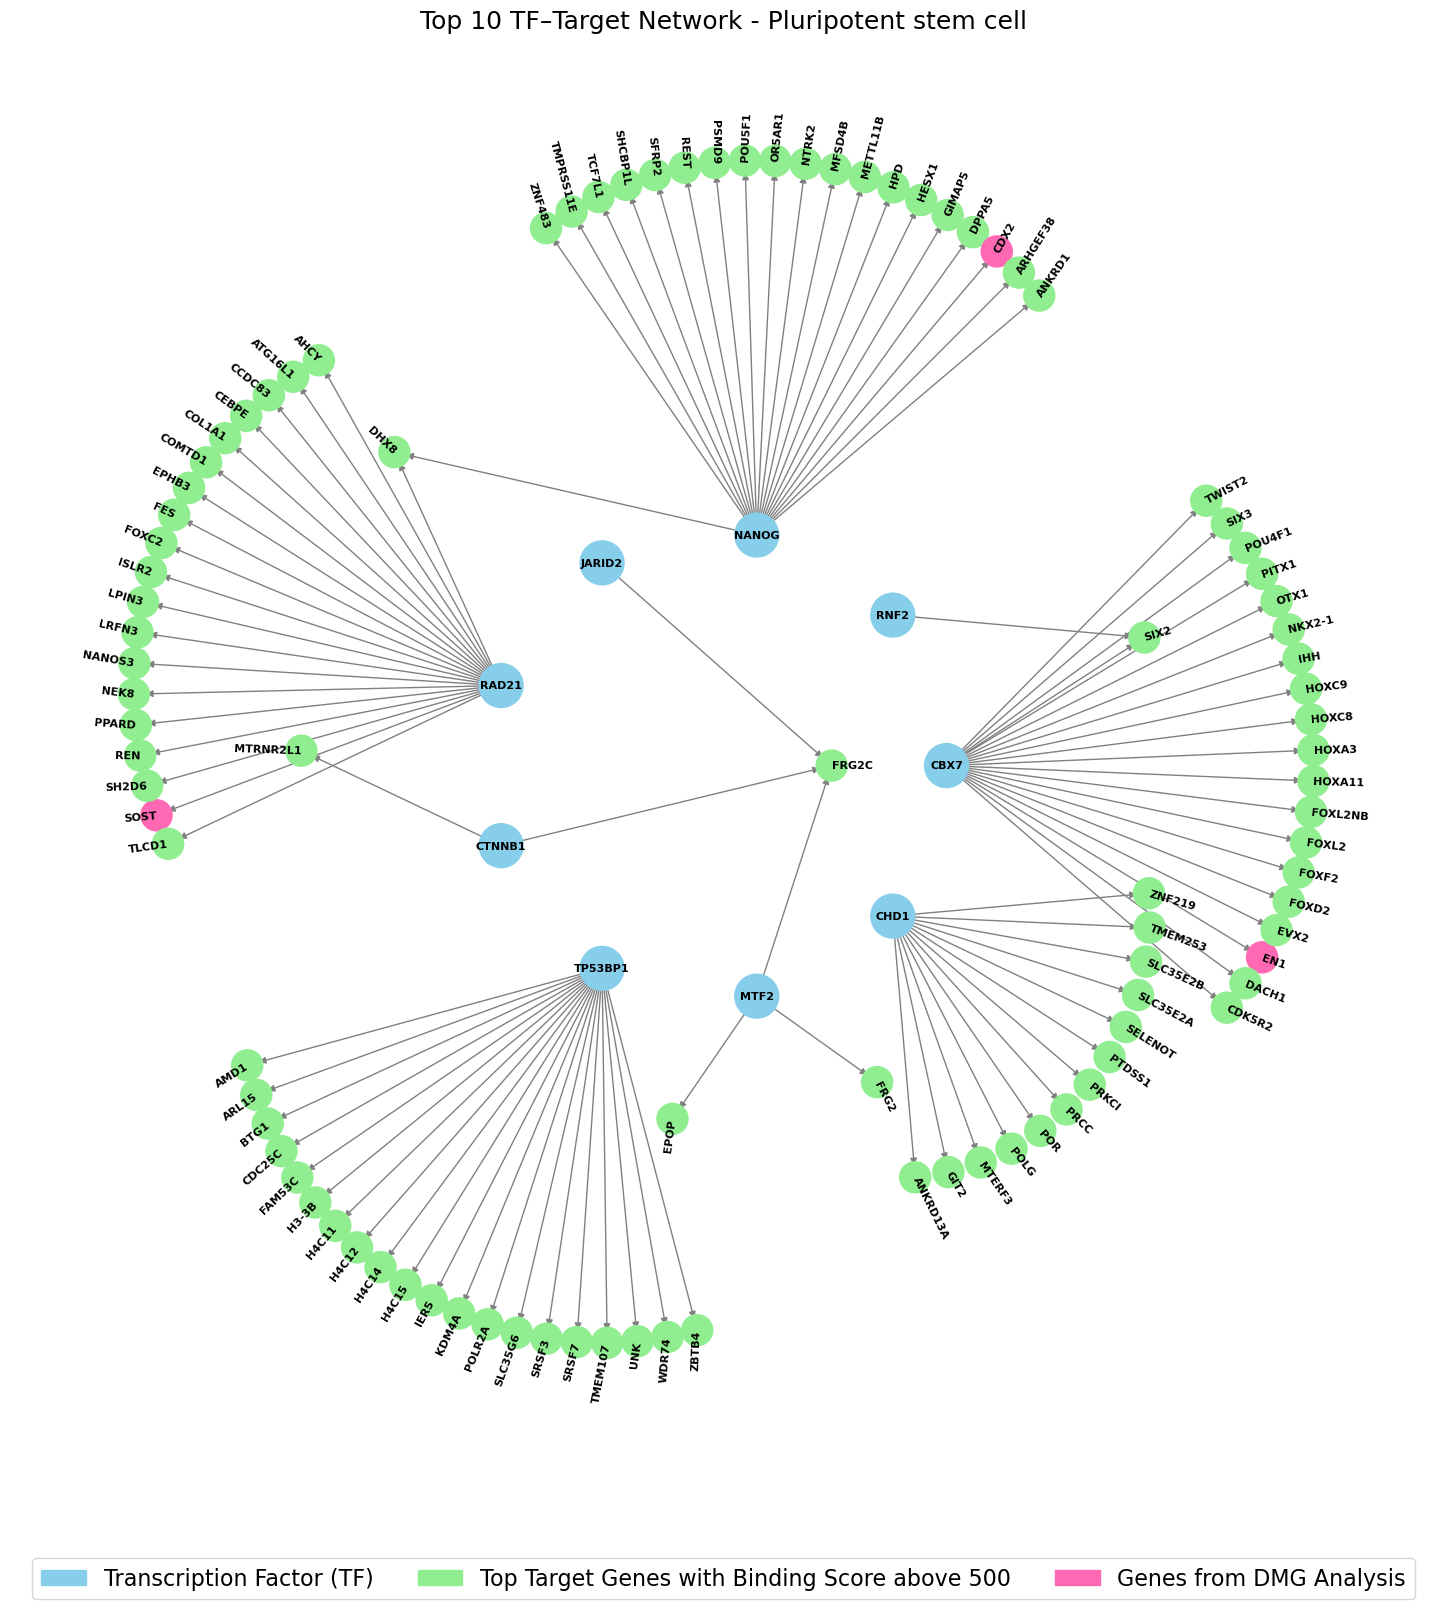

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict
import matplotlib.patches as mpatches

# --- Load TF-target edges ---
edges_df = edges_df  # already loaded with 'TF' and 'Target_gene'

# --- Load the 74 gene list ---
input_genes = pd.read_csv("mCG_genenames_coords_withlifted.csv")
input_genes.columns = ["ensumblID", "chr", "start", "end", "gene_name"]
gene_set = set(input_genes["gene_name"].astype(str))

# --- Get top 10 TFs and interleave by sparse/dense ---
tf_counts = edges_df["TF"].value_counts().nlargest(10)
sorted_tfs = tf_counts.index.tolist()
reordered_tfs = []
for i in range((len(sorted_tfs) + 1) // 2):
    if i < len(sorted_tfs) - i:
        reordered_tfs.append(sorted_tfs[i])
    if i != len(sorted_tfs) - 1 - i:
        reordered_tfs.append(sorted_tfs[-(i + 1)])
top_tfs = reordered_tfs

# --- Build graph ---
G = nx.DiGraph()
for _, row in edges_df.iterrows():
    G.add_edge(row["TF"], row["Target_gene"])

# --- Count target gene sharedness ---
target_counts = defaultdict(int)
for _, row in edges_df.iterrows():
    target_counts[row["Target_gene"]] += 1

# --- Depth for potential other use ---
depth_by_node = {}
for node in G.nodes:
    if node in top_tfs:
        depth_by_node[node] = 0
    elif node in target_counts:
        count = target_counts[node]
        if count >= 3:
            depth_by_node[node] = 1.0
        elif count == 2:
            depth_by_node[node] = 1.5
        else:
            depth_by_node[node] = 2.0

# --- Layout with center for highly shared targets ---
def radial_fan_layout_with_center(G, top_tfs, target_counts):
    pos = {}
    center_targets = [t for t, c in target_counts.items() if c >= 3]
    placed_targets = set(center_targets)

    # --- Shared targets in center ---
    for i, tgt in enumerate(center_targets):
        angle = 2 * np.pi * i / len(center_targets)
        x = 0.5 * np.cos(angle)
        y = 0.5 * np.sin(angle)
        pos[tgt] = (x, y)

    # --- TF fans ---
    angle_step = 2 * np.pi / len(top_tfs)
    for i, tf in enumerate(top_tfs):
        tf_angle = i * angle_step
        tf_x, tf_y = np.cos(tf_angle), np.sin(tf_angle)
        pos[tf] = (tf_x, tf_y)

        targets = [t for t in G.neighbors(tf) if t not in placed_targets]
        targets.sort(key=lambda g: (-target_counts[g], g))
        spread = np.pi / 2
        offset = -spread / 2

        for j, target in enumerate(targets):
            angle_offset = offset + j * (spread / max(len(targets) - 1, 1))
            angle = tf_angle + angle_offset

            sharedness = target_counts[target]
            base_radius = 0.6 + 0.5 * (3 - min(sharedness, 3))

            # 🔧 Reduce CHD1 radius by a factor (e.g., 0.8×)
            if tf == "CHD1":
                base_radius *= 0.7
                
             # 🔧 Reduce MTF2 radius by a factor (e.g., 0.8×)
            if tf == "MTF2":
                base_radius *= 0.4
                
             # 🔧 Reduce CTNNB1 radius by a factor (e.g., 0.8×)
            if tf == "CTNNB1":
                base_radius *= 0.6


            tgt_x = tf_x + base_radius * np.cos(angle)
            tgt_y = tf_y + base_radius * np.sin(angle)
            pos[target] = (tgt_x, tgt_y)

    return pos


pos = radial_fan_layout_with_center(G, top_tfs, target_counts)


# --- Node colors and sizes ---
node_colors = []
node_sizes = []
for node in G.nodes:
    if node in top_tfs:
        node_colors.append("skyblue")
        node_sizes.append(1000)
    elif node in gene_set:
        node_colors.append("hotpink")
        node_sizes.append(500)
    else:
        node_colors.append("lightgreen")
        node_sizes.append(500)

# --- Draw the network ---
plt.figure(figsize=(16, 16))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)
for node, (x, y) in pos.items():
    if node in top_tfs:
        ha = 'center'
        angle = 0
    else:
        angle = np.degrees(np.arctan2(y, x))
        if x < 0:
            angle += 180  # Flip text direction for left-side nodes
            ha = 'right'
        else:
            ha = 'left'
            
    plt.text(x, y, node,
             fontsize=8,
             fontweight='bold',
             ha=ha,
             va='center',
             rotation=angle,
             rotation_mode='anchor')


# --- Legend ---
legend_handles = [
    mpatches.Patch(color='skyblue', label='Transcription Factor (TF)', ),
    mpatches.Patch(color='lightgreen', label='Top Target Genes with Binding Score above 500'),
    mpatches.Patch(color='hotpink', label='Genes from DMG Analysis')
]
plt.legend(handles=legend_handles, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=3, fontsize=16)

plt.title("Top 10 TF–Target Network - Pluripotent stem cell", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.savefig("chip_atlas_data/TF_Target_Radial_Sharedness_Center.png", dpi=300)
plt.show()


In [24]:
import pandas as pd
import gseapy as gp
import os

# --- Step 1: Load edges ---
edges_df = pd.read_csv("chip_atlas_data/TF_Target_Edges.csv")  # TF → Target_gene

# --- Step 2: Group targets per TF ---
tf_targets = edges_df.groupby("TF")["Target_gene"].apply(set).to_dict()

# --- Step 3: Identify shared genes (targeted by ≥2 TFs) ---
from collections import Counter
gene_counter = Counter(edges_df["Target_gene"])
shared_genes = {g for g, c in gene_counter.items() if c >= 2}

# --- Step 4: GO Enrichment Function ---
def run_go_enrichment(gene_list, tf_name, outdir, cutoff=0.5):
    enr = gp.enrichr(
        gene_list=list(gene_list),
        gene_sets=["GO_Biological_Process_2021"],
        organism="Human",  # adjust if needed
        outdir=os.path.join(outdir, tf_name.replace("/", "_")),
        cutoff=cutoff,  # p-value threshold
        no_plot=True    # turn off plotting to avoid crash
    )
    
    # Save only if results are found
    if enr.results.shape[0] > 0:
        result_file = os.path.join(outdir, f"{tf_name.replace('/', '_')}_GO_results.csv")
        enr.results.to_csv(result_file, index=False)
    else:
        print(f"No enriched terms found for {tf_name}")

    return enr.results


# --- Step 5: Run enrichment per TF ---
output_dir = "chip_atlas_data/GO_TF_Enrichments"
os.makedirs(output_dir, exist_ok=True)

go_results = {}
for tf, genes in tf_targets.items():
    res = run_go_enrichment(genes, tf, output_dir)
    go_results[tf] = res

# --- Step 6: Run enrichment for shared genes ---
shared_go = run_go_enrichment(shared_genes, "SharedTargets", output_dir)

# --- Step 7: Save all results ---
for tf, df in go_results.items():
    df.to_csv(f"{output_dir}/{tf}_GO.csv", index=False)

shared_go.to_csv(f"{output_dir}/SharedTargets_GO.csv", index=False)


No enriched terms found for JARID2


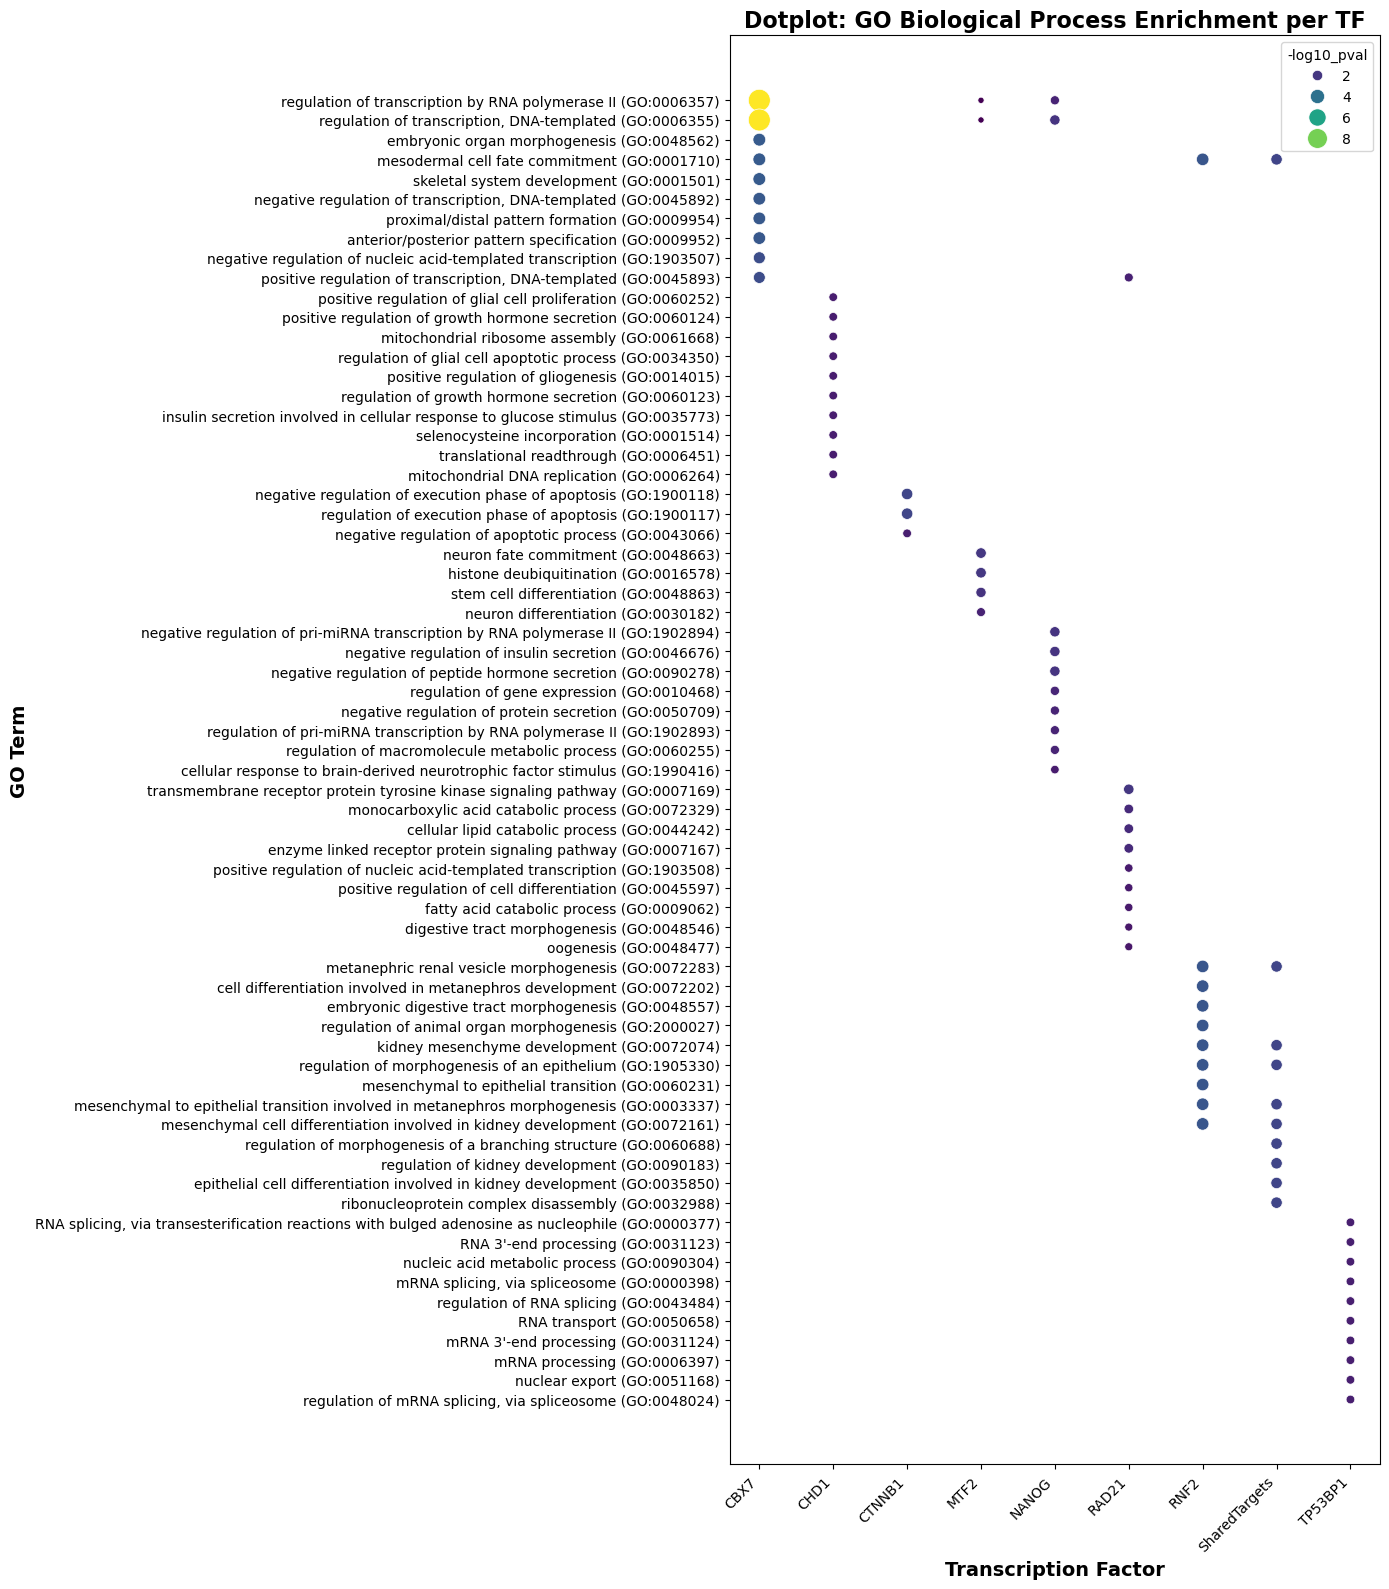

In [19]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === SETTINGS ===
go_dir = "chip_atlas_data/GO_TF_Enrichments/"
go_category = "GO_Biological_Process_2021"
top_n = 10

# === COLLECT ALL RESULTS ===
all_go_terms = []

for filepath in glob.glob(os.path.join(go_dir, "*_GO_results.csv")):
    tf = os.path.basename(filepath).replace("_GO_results.csv", "")
    tf = tf.replace("JARID2", "")
    df = pd.read_csv(filepath)

    # Filter by GO category
    df = df[df["Gene_set"] == go_category]
    if df.empty:
        continue

    # Sort by Adjusted P-value and select top N
    df = df.sort_values("Adjusted P-value").head(top_n)

    # Calculate -log10(p) and add TF info
    df["TF"] = tf
    df["GO_term"] = df["Term"]
    df["-log10_pval"] = -np.log10(df["Adjusted P-value"] + 1e-10)

    all_go_terms.append(df[["TF", "GO_term", "-log10_pval"]])

# === COMBINE AND PLOT ===
if not all_go_terms:
    print("No valid GO results found.")
else:
    plot_df = pd.concat(all_go_terms)

    # Plot
    plt.figure(figsize=(14, 16))
    sns.scatterplot(
        data=plot_df,
        x='TF',
        y='GO_term',
        size='-log10_pval',
        hue='-log10_pval',
        palette='viridis',
        sizes=(20, 250),
        legend='brief'
    )

    plt.xlabel("Transcription Factor", fontsize=14, weight='bold')
    plt.ylabel("GO Term", fontsize=14, weight='bold')
    plt.title("Dotplot: GO Biological Process Enrichment per TF", fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("chip_atlas_data/GO_TF_Enrichments/GO_dotplot_allTFs.png", dpi=300)
    plt.show()


In [25]:
import pandas as pd
import gseapy as gp
import os

# --- Step 1: Load edges ---
edges_df = pd.read_csv("chip_atlas_data/TF_Target_Edges.csv")  # TF → Target_gene

# --- Step 2: Group targets per TF ---
tf_targets = edges_df.groupby("TF")["Target_gene"].apply(set).to_dict()

# --- Step 3: Identify shared genes (targeted by ≥2 TFs) ---
from collections import Counter
gene_counter = Counter(edges_df["Target_gene"])
shared_genes = {g for g, c in gene_counter.items() if c >= 2}

# --- Step 4: GO Enrichment Function ---
def run_go_enrichment(gene_list, tf_name, outdir, cutoff=0.5):
    enr = gp.enrichr(
        gene_list=list(gene_list),
        gene_sets=["KEGG_2021_Human"],
        organism="Human",  # adjust if needed
        outdir=os.path.join(outdir, tf_name.replace("/", "_")),
        cutoff=cutoff,  # p-value threshold
        no_plot=True    # turn off plotting to avoid crash
    )
    
    # Save only if results are found
    if enr.results.shape[0] > 0:
        result_file = os.path.join(outdir, f"{tf_name.replace('/', '_')}_KEGG_results.csv")
        enr.results.to_csv(result_file, index=False)
    else:
        print(f"No enriched terms found for {tf_name}")

    return enr.results


# --- Step 5: Run enrichment per TF ---
output_dir = "chip_atlas_data/GO_TF_Enrichments"
os.makedirs(output_dir, exist_ok=True)

go_results = {}
for tf, genes in tf_targets.items():
    res = run_go_enrichment(genes, tf, output_dir)
    go_results[tf] = res

# --- Step 6: Run enrichment for shared genes ---
shared_go = run_go_enrichment(shared_genes, "SharedTargets", output_dir)

# --- Step 7: Save all results ---
for tf, df in go_results.items():
    df.to_csv(f"{output_dir}/{tf}_KEGG.csv", index=False)

shared_go.to_csv(f"{output_dir}/SharedTargets_KEGG.csv", index=False)


No enriched terms found for CTNNB1
No enriched terms found for JARID2
No enriched terms found for MTF2
No enriched terms found for RNF2


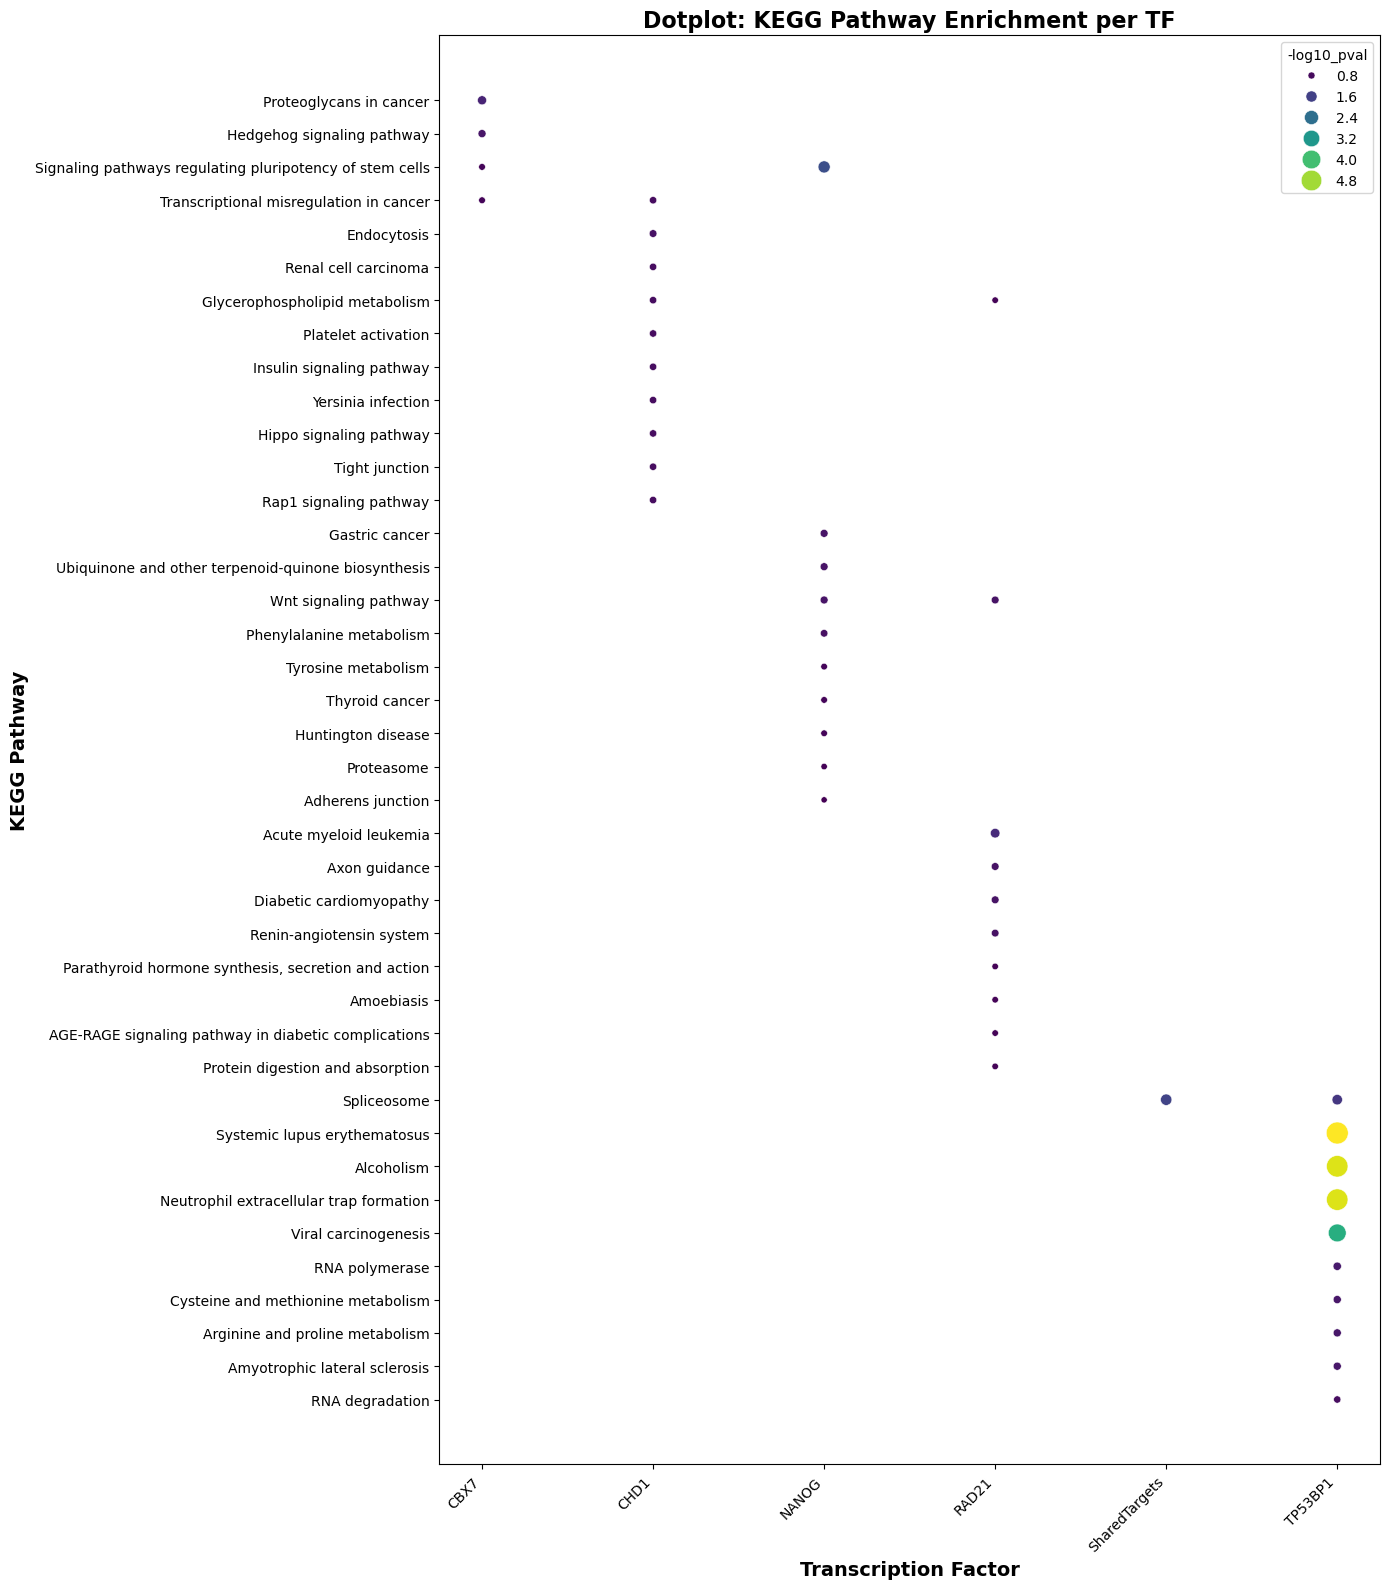

In [26]:
import os
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === SETTINGS ===
go_dir = "chip_atlas_data/GO_TF_Enrichments/"
go_category = "KEGG_2021_Human"  # <- KEY CHANGE
top_n = 10

# === COLLECT ALL RESULTS ===
all_kegg_terms = []

for filepath in glob.glob(os.path.join(go_dir, "*_KEGG_results.csv")):
    tf = os.path.basename(filepath).replace("_KEGG_results.csv", "")
    if tf == "JARID2":
        continue
    df = pd.read_csv(filepath)

    df = df[df["Gene_set"] == go_category]
    if df.empty:
        continue

    df = df.sort_values("Adjusted P-value").head(top_n)
    df["TF"] = tf
    df["GO_term"] = df["Term"]
    df["-log10_pval"] = -np.log10(df["Adjusted P-value"] + 1e-10)
    all_kegg_terms.append(df[["TF", "GO_term", "-log10_pval"]])

# === COMBINE AND PLOT ===
if not all_kegg_terms:
    print("No valid KEGG results found.")
else:
    plot_df = pd.concat(all_kegg_terms)

    plt.figure(figsize=(14, 16))
    sns.scatterplot(
        data=plot_df,
        x='TF',
        y='GO_term',
        size='-log10_pval',
        hue='-log10_pval',
        palette='viridis',
        sizes=(20, 250),
        legend='brief'
    )

    plt.xlabel("Transcription Factor", fontsize=14, weight='bold')
    plt.ylabel("KEGG Pathway", fontsize=14, weight='bold')
    plt.title("Dotplot: KEGG Pathway Enrichment per TF", fontsize=16, weight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig("chip_atlas_data/GO_TF_Enrichments/KEGG_dotplot_allTFs.png", dpi=300)
    plt.show()
